## Exercício 1

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

Sim, o modelo aprendido pode mudar a cada vez que a função <i>fit</i> é utilizada, especialmente quando se utiliza o SGDRegressor (descida do gradiente estocástico). Isso acontece porque o SGDRegressor utiliza inicialização aleatória dos pesos e o processo de otimização depende da ordem dos dados e de fatores aleatórios internos. Portanto, ao rodar o fit múltiplas vezes, os coeficientes aprendidos podem ser diferentes em cada execução, a menos que você defina o parâmetro random_state para garantir reprodutibilidade.

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?

Não, os modelos finais aprendidos não são os mesmos da outra implementação de regressão linear. 
O LinearRegression encontra a solução exata para o problema, enquanto o SGDRegressor encontra uma solução aproximada, que pode variar a cada execução devido à aleatoriedade do processo de otimização. Por isso, os coeficientes finais geralmente são diferentes entre as duas abordagens, a menos que o SGD converja exatamente para a solução ótima (o que raramente acontece na prática sem ajuste fino dos hiperparâmetros e controle do random_state).


In [5]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
X = dados_por.loc[:,['tamanho']]

y = dados_por.loc[:,['preco']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)  # X é o conjunto de atributos


In [8]:
from sklearn.linear_model import SGDRegressor

modelo_sgd = SGDRegressor(max_iter=5000, tol=1e-3, eta0=0.01)
modelo_sgd.fit(X_normalizado, y.values.ravel())

print(modelo_sgd.coef_, modelo_sgd.intercept_)


[105701.82949491] [340284.44524543]


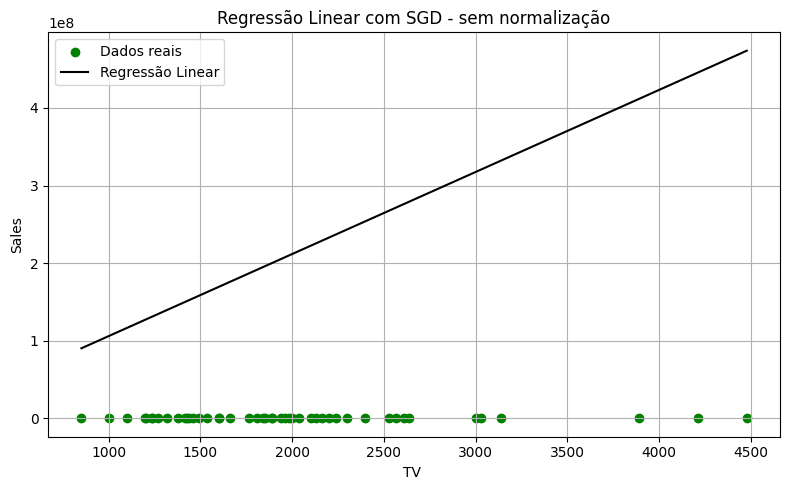

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave
X_sorted = np.sort(X_plot, axis=0)
y_pred = modelo_sgd.predict(X_sorted)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('TV ')
plt.ylabel('Sales')
plt.title('Regressão Linear com SGD - sem normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [10]:
#  RRS com tamanho
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 2. Treinar o modelo com X normalizado
modelo = LinearRegression()
modelo.fit(X_normalizado, y)

# 3. Prever
y_pred = modelo.predict(X_normalizado)

# 4. Calcular RSS e R²
RSS = np.sum((y.values.ravel() - y_pred.ravel())**2)
R2 = r2_score(y, y_pred)

# 5. Exibir
print ('Com Tamamnho')
print(f"RSS = {RSS:.2f}")
print(f"R² = {R2:.4f}")

Com Tamamnho
RSS = 193464477600.71
R² = 0.7310


In [11]:
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:

X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)  # X é o conjunto de atributos

In [14]:
from sklearn.linear_model import SGDRegressor

modelo_sgd = SGDRegressor(max_iter=5000, tol=1e-3, eta0=0.01)
modelo_sgd.fit(X_normalizado, y.values.ravel())


print(modelo_sgd.coef_, modelo_sgd.intercept_)

[54668.8487257] [340262.9921947]


C:\Users\MASTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


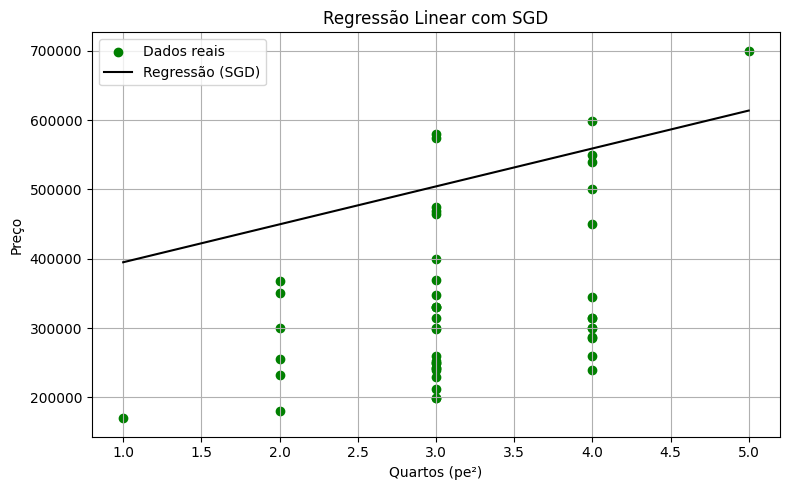

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave
X_sorted = np.sort(X_plot, axis=0)
X_sorted_df = pd.DataFrame(X_sorted, columns=['quartos'])
y_pred = modelo_sgd.predict(X_sorted_df)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão (SGD)')
plt.xlabel('Quartos (pe²)')
plt.ylabel('Preço')
plt.title('Regressão Linear com SGD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
#  RRS com tamanho
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 2. Treinar o modelo com X normalizado
modelo = LinearRegression()
modelo.fit(X_normalizado, y)

# 3. Prever
y_pred = modelo.predict(X_normalizado)

# 4. Calcular RSS e R²
RSS = np.sum((y.values.ravel() - y_pred.ravel())**2)
R2 = r2_score(y, y_pred)

# 5. Exibir
print ('Com Quartos')
print(f"RSS = {RSS:.2f}")
print(f"R² = {R2:.4f}")

Com Quartos
RSS = 578535325112.52
R² = 0.1956


In [17]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
X = dados_adv.loc[:,['TV']]
y = dados_adv.loc[:,['sales']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

C:\Users\MASTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


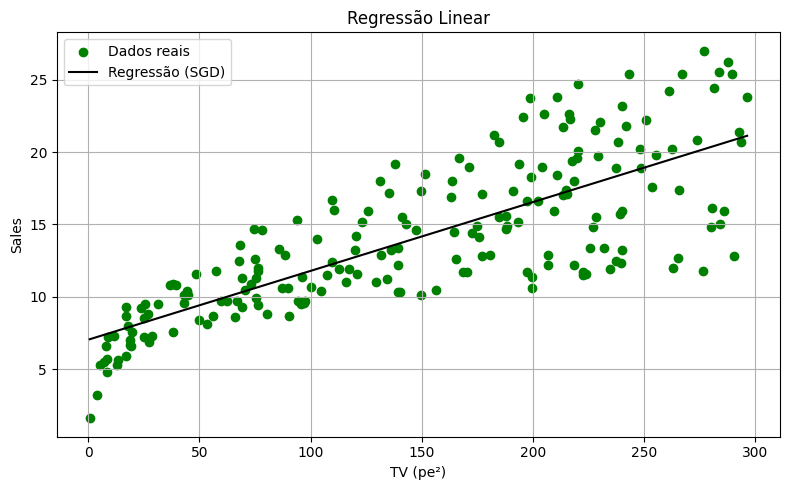

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave
X_sorted = np.sort(X_plot, axis=0)
y_pred = reg.predict(X_sorted)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão (SGD)')
plt.xlabel('TV (pe²)')
plt.ylabel('Sales')
plt.title('Regressão Linear')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0)
reg_grad.fit(X,y.values.ravel())

print(reg_grad.coef_, reg_grad.intercept_)

[9.70599232e+10] [1.81361747e+10]


C:\Users\MASTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


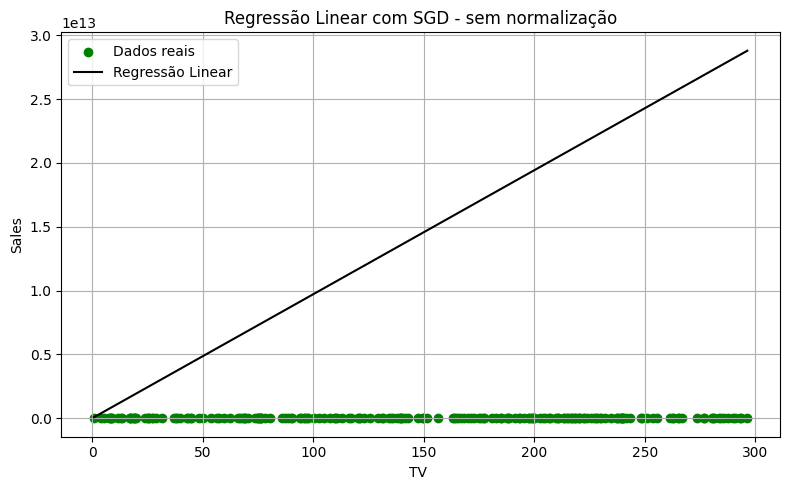

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave
X_sorted = np.sort(X_plot, axis=0)
y_pred = reg_grad.predict(X_sorted)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('TV ')
plt.ylabel('Sales')
plt.title('Regressão Linear com SGD - sem normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)  # X é o conjunto de atributos

In [23]:
from sklearn.linear_model import SGDRegressor

modelo_sgd = SGDRegressor(max_iter=5000, tol=1e-3, eta0=0.01)
modelo_sgd.fit(X_normalizado, y.values.ravel())


print(modelo_sgd.coef_, modelo_sgd.intercept_)

[4.07393323] [14.00949257]


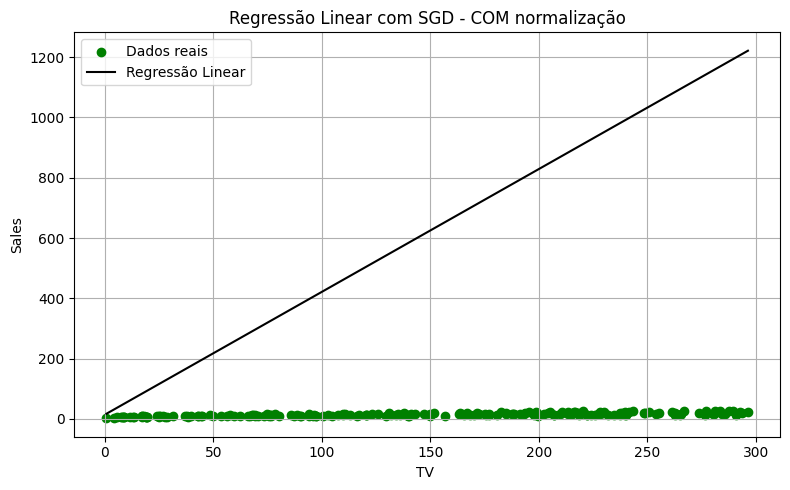

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave
X_sorted = np.sort(X_plot, axis=0)
y_pred = modelo_sgd.predict(X_sorted)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('TV ')
plt.ylabel('Sales')
plt.title('Regressão Linear com SGD - COM normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Preditor newspaper
X = dados_adv.loc[:,['newspaper']]
y = dados_adv.loc[:,['sales']]

In [26]:
reg = LinearRegression().fit(X,y)
reg

LinearRegression()

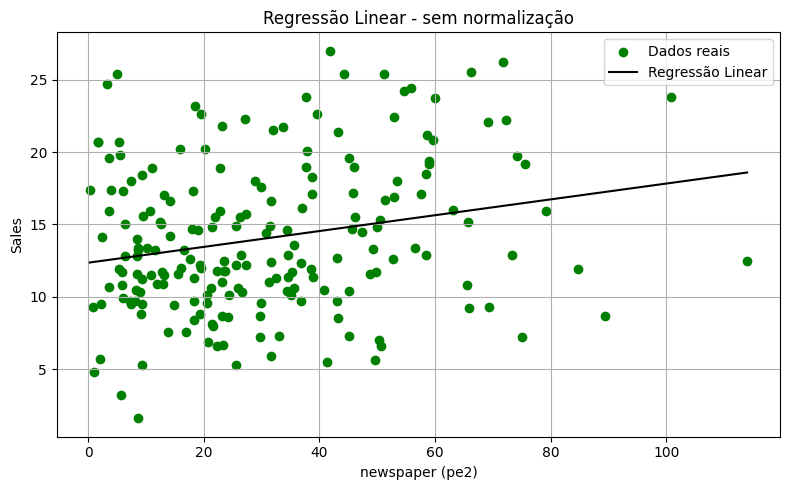

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave

X_sorted = np.sort(X_plot, axis=0)
X_sorted_df = pd.DataFrame(X_sorted, columns=["newspaper"])
y_pred = reg.predict(X_sorted_df)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('newspaper (pe2)')
plt.ylabel('Sales')
plt.title('Regressão Linear - sem normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Regressor com SGDRegressor
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0)
reg_grad.fit(X,y.values.ravel())

print(reg_grad.coef_, reg_grad.intercept_)


[65374878.01812045] [-4.76524966e+09]


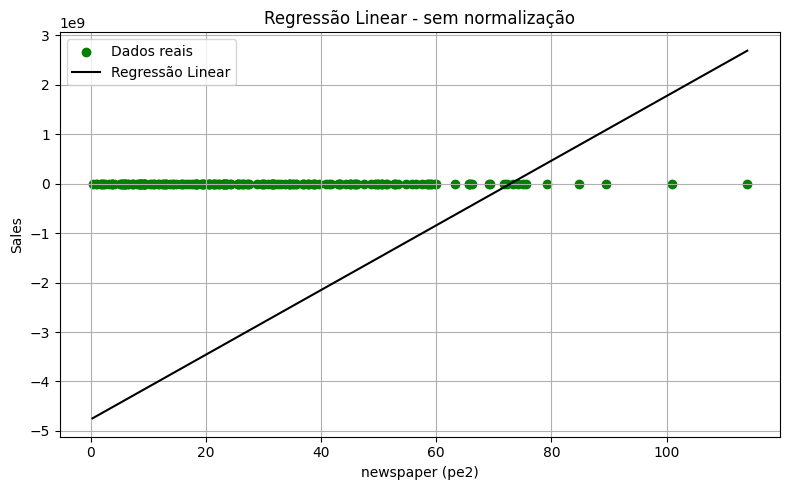

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave

X_sorted = np.sort(X_plot, axis=0)
X_sorted_df = pd.DataFrame(X_sorted, columns=["newspaper"])
y_pred = reg_grad.predict(X_sorted_df)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('newspaper (pe2)')
plt.ylabel('Sales')
plt.title('Regressão Linear - sem normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

In [31]:
# Regressor com SGDRegressor
from sklearn.linear_model import SGDRegressor
modelo_sgd = SGDRegressor(max_iter=5000, tol=1e-3, eta0=0.01)
modelo_sgd.fit(X_normalizado, y.values.ravel())

print(modelo_sgd.coef_, modelo_sgd.intercept_)


[1.18356759] [14.02376654]


C:\Users\MASTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


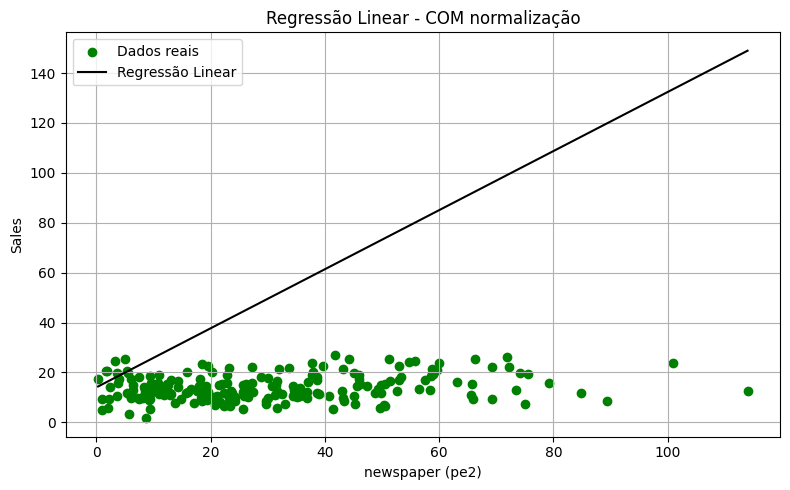

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Garantir consistência
X_plot = X.values if hasattr(X, "values") else X
y_plot = y.values.ravel() if hasattr(y, "values") else y

# Ordenar os valores para a linha de regressão ficar suave

X_sorted = np.sort(X_plot, axis=0)
X_sorted_df = pd.DataFrame(X_sorted, columns=["newspaper"])
y_pred = modelo_sgd.predict(X_sorted_df)

# Plotar
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_plot, color='green', label='Dados reais')
plt.plot(X_sorted, y_pred, color='black', label='Regressão Linear')
plt.xlabel('newspaper (pe2)')
plt.ylabel('Sales')
plt.title('Regressão Linear - COM normalização')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Exercício 2


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

Sim, é possível obter um modelo melhor utilizando todos os dados (ou seja, mais de um atributo preditor). 
Ao comparar os modelos com apenas um preditor (por exemplo, apenas "tamanho" ou apenas "quartos") com o modelo que utiliza ambos ("tamanho" e "quartos"), observa-se que o modelo com ambos apresenta um RSS (Soma dos Quadrados dos Resíduos) menor e um R² maior.

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

Sim, existem atributos que podem ser desconsiderados sem afetar significativamente a precisão do modelo.
A análise dos valores-p mostra que o atributo "quartos" tem um p-valor alto (≈ 0.57), indicando que ele não é estatisticamente significativo para prever o preço.

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?

A implementação com descida de gradiente (SGDRegressor) treina mais rápido do que o método dos mínimos quadrados (LinearRegression).


In [33]:
X = dados_por.drop(columns=['preco'])  # usa todas as colunas exceto a resposta
y = dados_por['preco']

In [34]:
#1 Exec 2 normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)  # X é o conjunto de atributos

In [35]:
import time
from sklearn.linear_model import LinearRegression

# Começar o cronômetro
start_time = time.time()

#2 fir comSGDR
from sklearn.linear_model import SGDRegressor

modelo_sgd = SGDRegressor(max_iter=5000, tol=1e-3, eta0=0.01)
modelo_sgd.fit(X_normalizado , y.values.ravel())

# Calcular o tempo decorrido
elapsed_time = time.time() - start_time
print(f"Tempo de treinamento: {elapsed_time:.6f} segundos")


Tempo de treinamento: 0.000998 segundos


In [36]:

print(modelo_sgd.coef_, modelo_sgd.intercept_)


[108879.26493057  -5978.07086956] [340399.09783003]


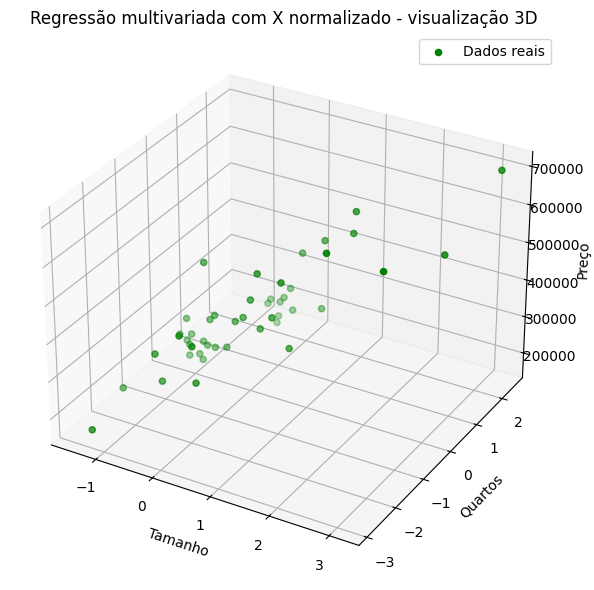

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Garantir que y esteja em formato compatível
y_plot = y.values.ravel() if hasattr(y, "values") else y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Usar as duas primeiras colunas de X_normalizado
ax.scatter(X_normalizado[:, 0], X_normalizado[:, 1], y_plot, color='green', label='Dados reais')

ax.set_xlabel('Tamanho')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.set_title('Regressão multivariada com X normalizado - visualização 3D')
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
import time
from sklearn.linear_model import LinearRegression

# Começar o cronômetro
start_time = time.time()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 2. Treinar o modelo com X normalizado
modelo = LinearRegression()
modelo.fit(X_normalizado, y)

# 3. Prever
y_pred = modelo.predict(X_normalizado)

# 4. Calcular RSS e R²
RSS = np.sum((y.values.ravel() - y_pred.ravel())**2)
R2 = r2_score(y, y_pred)

# Calcular o tempo decorrido
elapsed_time = time.time() - start_time
print(f"Tempo de treinamento: {elapsed_time:.6f} segundos")


Tempo de treinamento: 0.002001 segundos


In [39]:
# 5. Exibir
print('Ambos')
print(f"RSS = {RSS:.2f}")
print(f"R² = {R2:.4f}")


Ambos
RSS = 192068324756.67
R² = 0.7329


# Exercício 3

Realizar a análise da qualidade dos preditores utilizados no modelo construído.

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

A análise do gráfico mostra que os resíduos estão razoavelmente distribuídos de forma aleatória ao redor de 0, sem padrão claro. Isso indica que o modelo está adequado e não há evidências de problemas como heterocedasticidade ou relação não linear não capturada. Portanto, os resíduos estão sim aleatoriamente distribuídos ao redor de 0.

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.

Análise dos valores p:

O valor p para "tamanho" é muito baixo (≈ 0.0000), indicando que é um preditor significativo.
O valor p para "quartos" é alto (≈ 0.57), indicando que não é significativo.
Seleção de variáveis:

Com base nos valores p, o modelo ideal deve incluir apenas "tamanho" como preditor.
Comparação de desempenho:

O R² do modelo com todas as variáveis é maior, mas a diferença é pequena.
O modelo com apenas "tamanho" é mais simples e quase tão preciso quanto o modelo com ambos os preditores.


In [3]:
%pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------  9.7/9.8 MB 54.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 51.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\MASTER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


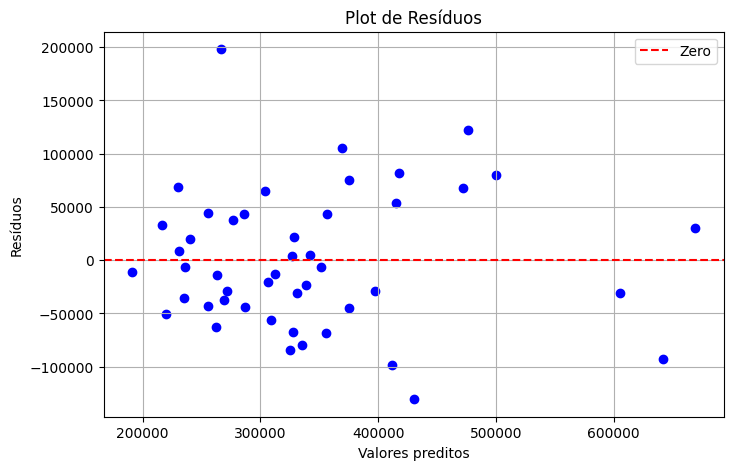

R² com todas as variáveis: 0.7329
R² com apenas 'quartos': 0.1956


In [40]:
#novo -- recupera o modelo ja treinado na etapa anterior
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


# Suponha que dados_por e modelo treinado já existam
df = pd.DataFrame(dados_por)

# Variáveis preditoras e resposta
X = df[['tamanho', 'quartos']]
y = df['preco']

# Normalizar
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)


# Modelo já treinado
modelo = LinearRegression()
modelo.fit(X_normalizado, y)

# Gerar predições e resíduos
y_pred = modelo.predict(X_normalizado)
residuos = y - y_pred

# Plot de resíduos
plt.figure(figsize=(8, 5))
plt.axhline(0, color='red', linestyle='--', label='Zero')
plt.scatter(y_pred, residuos, color='blue')
plt.xlabel("Valores preditos")
plt.ylabel("Resíduos")
plt.title("Plot de Resíduos")
plt.legend()
plt.grid(True)
plt.show()

# R² com todas as variáveis
r2_total = r2_score(y, y_pred)

# Modelo com apenas 'quartos'
X_quartos = df[['quartos']]
X_quartos_normalizado = scaler.fit_transform(X_quartos)

modelo_quartos = LinearRegression()
modelo_quartos.fit(X_quartos_normalizado, y)
y_pred_quartos = modelo_quartos.predict(X_quartos_normalizado)
r2_quartos = r2_score(y, y_pred_quartos)

# Impressão dos R²
print(f"R² com todas as variáveis: {r2_total:.4f}")
print(f"R² com apenas 'quartos': {r2_quartos:.4f}")


In [41]:
# Exemplo: Cálculo dos valores-p com sklearn (referência ao StackOverflow)
import numpy as np
import pandas as pd
from scipy import stats

# 1. Construir a matriz X com constante
X = np.append(np.ones((X_normalizado.shape[0], 1)), X_normalizado, axis=1)

# 2. Coeficientes
params = np.append(modelo.intercept_, modelo.coef_)

# 3. Predições
predictions = modelo.predict(X_normalizado)

# 4. Erro padrão residual
MSE = (sum((y.values.ravel() - predictions.ravel())**2)) / (X.shape[0] - X.shape[1])

# 5. Variância e erros padrão dos coeficientes
var_b = MSE * (np.linalg.inv(X.T @ X).diagonal())
sd_b = np.sqrt(var_b)

# 6. Estatística t
t_stats = params / sd_b

# 7. Valores-p
p_values = [2 * (1 - stats.t.cdf(np.abs(i), X.shape[0] - X.shape[1])) for i in t_stats]

# 8. Resultado
tabela = pd.DataFrame({
    "Coef": params,
    "Erro Padrão": sd_b,
    "t": t_stats,
    "p-valor": np.round(p_values, 4)
}, index=["constante"] + list(df[['tamanho', 'quartos']].columns))
print(tabela)


                    Coef   Erro Padrão          t  p-valor
constante  340412.659574   9637.238502  35.322635   0.0000
tamanho    109447.796470  11631.945270   9.409243   0.0000
quartos     -6578.354854  11631.945270  -0.565542   0.5746


                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           2.43e-13
Time:                        16:32:22   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.0

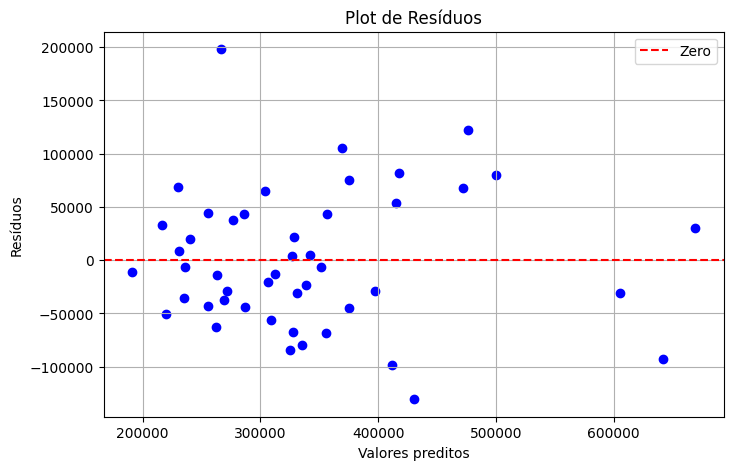

R² com todas as variáveis: 0.7329
R² com apenas 'quartos': 0.1956


In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

dados = dados_por
df = pd.DataFrame(dados)


# Normalizar apenas os preditores
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['tamanho', 'quartos']])
X_scaled_df = pd.DataFrame(X_scaled, columns=['tamanho', 'quartos'])

# Adicionar constante depois
X_final = sm.add_constant(X_scaled_df)

# Regressão com statsmodels
modelo = sm.OLS(y, X_final).fit()
print(modelo.summary())

# Plot de resíduos
y_pred = modelo.predict(X_final)
residuos = y - y_pred

plt.figure(figsize=(8, 5))
plt.axhline(0, color='red', linestyle='--', label='Zero')
plt.scatter(y_pred, residuos, color='blue')
plt.xlabel("Valores preditos")
plt.ylabel("Resíduos")
plt.title("Plot de Resíduos")
plt.legend()
plt.grid(True)
plt.show()

# Modelo somente com variável mais significativa (quartos)
X_quartos = sm.add_constant(df[['quartos']])
modelo_quartos = sm.OLS(y, X_quartos).fit()

# Comparação de R²
print(f"R² com todas as variáveis: {modelo.rsquared:.4f}")
print(f"R² com apenas 'quartos': {modelo_quartos.rsquared:.4f}")


# Exercício 4

Realizar o teste para descobrir multicolinearidade entre variáveis preditivas;

1) Utilizando [esse link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) fazer o cáclulo do fator de inflação da variância (*Variance Inflation Factor - VIF*). Existe alguma evidência de multicolinearidade entre as variáveis preditivas?

Não, o VIF ficou abaixo de 2.

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Supondo que seus dados estejam em df e as variáveis preditoras sejam:
X = df[['tamanho', 'quartos']]

# Adiciona a constante (intercepto)
X_const = sm.add_constant(X)

# Calcula o VIF para cada variável
vif_df = pd.DataFrame()
vif_df["variavel"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)


  variavel        VIF
0    const  18.783221
1  tamanho   1.456799
2  quartos   1.456799


In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df = []
dados = dados_adv
df_adv = pd.DataFrame(dados)
# Supondo que seus dados estejam em df e as variáveis preditoras sejam:
X = df_adv[['TV',	'radio', 'newspaper']]

# Adiciona a constante (intercepto)
X_const = sm.add_constant(X)

# Calcula o VIF para cada variável
vif_df = pd.DataFrame()
vif_df["variavel"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

    variavel       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187
